# European soccer data analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


I have selected the European Soccer Database, it contains data for soccer players, temas, matches and leagues from the 2008 to 2016 season. Also, include detailed attributes from the players and teams.

For descriptive purpose my data analysis process is aimed to answer the following questions:

> - Which are the first teams for the league and for the season?
> - Which are the last teams for the league and for the season?



For inferential purpose my data analysis process is aimed to answer the following questions:

> - What is the relationship between dribbling and body mass index?
> - What is the relationship between agility and body mass index?
> - What is the relationship between ball control and body mass index?
> - What is the relationship between balance and age?
> - What is the relationship between shot power and age?
> - What is the relationship between jumping and age?



In [51]:
# Importing packages for the present project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from datetime import datetime
from datetime import date
from functools import reduce



% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### Gathering Data

The database is stored in an SQLite database and is already uploaded in this workspace. The create_engine module from SQLAlchemy package was used for data gathering process. All the tables were used except for the Team Attributes table.   

In [2]:
# The create_engine() function was used to produces an Engine object based on a URL 
engine = create_engine("sqlite:///database.sqlite")

# The engine.connect() method was used to procure a connection resource
with engine.connect() as con:
    country = pd.read_sql_query('SELECT * FROM Country', con)
    league = pd.read_sql_query('SELECT * FROM League', con)
    match = pd.read_sql_query('SELECT * FROM Match', con)
    player = pd.read_sql_query('SELECT * FROM Player', con)
    player_attributes = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
    team = pd.read_sql_query('SELECT * FROM TEAM', con)


### Assessing data

#### General properties

The info method was used to check preliminary information about the DataFrames. Likewise, in a draft notebook, the head() and tail() methods were used to explore the data.

In [3]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [15]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [51]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [17]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [18]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


#### Missing Values

According to the result of the info method, the player_attributes and team datasets have null-values to evaluate.

In [4]:
player_attributes.isnull().values.any()
player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [5]:
team.isnull().values.any()
team.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

#### Duplicate values

The duplicated() and sum() method were used to check for duplicate values for each DataFrame, fortunately, none duplicate value was found. 

In [29]:
country_league.duplicated()
country_league.duplicated().sum()

0

The same structure as the above is shown was used in each DataFrame. 

### Cleaning data

For practical reasons, the country and league datasets were merged into a new one DataFrame called "country_league".

In [3]:
# Merge two datasets
country_league = pd.merge(country, league, on='id')

# Drop unnecesary columns
country_league.drop(country_league.columns[2,], axis=1, inplace=True)

# Rename columns
country_league.rename(index=str, columns={'name_x': 'country', 'name_y': 'league'}, inplace=True)

# Print the new dataset
country_league.head()

,id,country,league
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A


According to the purpose of the project, several columns are unnecessary.

In [4]:
# Check the columns in match dataset
player_attributes.columns.tolist()

# Select specific columns
player_attributes = player_attributes.iloc[:, [0,1,2,3,4,14,18,21,23,24,25]]

# Print player_attributes dataset
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,dribbling,ball_control,agility,balance,shot_power,jumping
0,1,218353,505942,2016-02-18 00:00:00,67.0,51.0,49.0,59.0,65.0,55.0,58.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,51.0,49.0,59.0,65.0,55.0,58.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,51.0,49.0,59.0,65.0,55.0,58.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,50.0,48.0,59.0,65.0,54.0,58.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,50.0,48.0,59.0,65.0,54.0,58.0


In [5]:
# Check the columns in match dataset
match.columns.tolist()

# Drop unnecesary columns
match.drop(match.columns[11:115], axis=1, inplace=True)

# Print match dataset
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [6]:
# Drop unnecesary columns 
team.drop(team.columns[2], axis=1, inplace=True)

# Print team dataset
team.head()


,id,team_api_id,team_long_name,team_short_name
0,1,9987,KRC Genk,GEN
1,2,9993,Beerschot AC,BAC
2,3,10000,SV Zulte-Waregem,ZUL
3,4,9994,Sporting Lokeren,LOK
4,5,9984,KSV Cercle Brugge,CEB



### Feature engineering

To determine that a team is first or last for the league and for the season, it should show the winners and the score for every team on each match. Therefore two functions were created for this purpose. 

First, the calculate_score function determines that the winning team gains 3 points, the losing team gains 0 points and, in case of a tie, each team receives 1 point. 

In [7]:
# Creating two columns in the match DataFrame for goals scored for the home and away team
def calculate_score(match, is_home):
    if match['home_team_goal'] == match['away_team_goal']:
        return 1
    if is_home == True:
        if match['home_team_goal'] > match['away_team_goal']:
            return 3
        else:
            return 0
    elif is_home == False:
        if match['home_team_goal'] > match['away_team_goal']:
            return 0
        else:
            return 3
    

# Applying the calculate_score function for each new column 
match['score_home'] = match.apply(lambda match: calculate_score(match, True), axis=1)

match['score_away'] = match.apply(lambda match: calculate_score(match, False), axis=1)

match.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,score_home,score_away
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,3,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,3


Then, the select_winner function shows the id of the winning team. 

In [8]:
# Creating one column in the match DataFrame for winning team
def select_winner(match):
    if match['home_team_goal'] == match['away_team_goal']:
        return 'tie'
    elif match['home_team_goal'] > match['away_team_goal']:
        return match['home_team_api_id']
    elif match['home_team_goal'] < match['away_team_goal']:
        return match['home_team_api_id']


# Applying the select_winner function to select the winning team id
match['winner'] = match.apply(lambda match: select_winner(match), axis=1)
match.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,score_home,score_away,winner
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,1,tie
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,1,tie
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,0,3,9984
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,3,0,9991
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,0,3,7947


In [9]:
# Grouping by the id of the away team and sum the score 
score_away = match.groupby('away_team_api_id')['score_away'].sum()


# Print 
score_away.tail()

away_team_api_id
158085    48
177361    14
188163    17
208931    15
274581    22
Name: score_away, dtype: int64

In [10]:
# Grouping by the id of the home team and sum the score 
score_home = match.groupby('home_team_api_id')['score_home'].sum()


# Print
score_home.head()

home_team_api_id
1601    190
1773     61
1957    216
2033     84
2182    249
Name: score_home, dtype: int64

In [11]:
# For the away teams, group by the league and season, and sum the score
score_away = match.groupby(['season', 'league_id', 'away_team_api_id'])['score_away'].sum()


# Print
score_away.head()

season     league_id  away_team_api_id
2008/2009  1          4049                 7
                      7947                16
                      8203                21
                      8342                24
                      8571                17
Name: score_away, dtype: int64

In [12]:
# For the home teams, group by the season and league, and sum the score
score_home = match.groupby(['season', 'league_id', 'home_team_api_id'])['score_home'].sum()


# Print
score_home.tail()

season     league_id  home_team_api_id
2015/2016  24558      10190               25
                      10191               23
                      10192               40
                      10199               29
                      10243               19
Name: score_home, dtype: int64

In [13]:
# Creating a DataFrame object with away and home score data 
scores = pd.DataFrame(score_away + score_home).reset_index()

# Assigning meaningful columns names
scores.columns = ['season', 'league_id', 'team_api_id', 'score']

# Print 
scores.head()

,season,league_id,team_api_id,score
0,2008/2009,1,4049,27
1,2008/2009,1,7947,35
2,2008/2009,1,8203,46
3,2008/2009,1,8342,59
4,2008/2009,1,8571,38


In [14]:
# Sorting the score values for check the first and last teams by league and season
scores = scores.sort_values(['season', 'score'], ascending=[True, False])

# Print 
scores.head()

,season,league_id,team_api_id,score
36,2008/2009,1729,10260,90
167,2008/2009,21518,8634,87
26,2008/2009,1729,8650,86
149,2008/2009,19694,8548,86
86,2008/2009,10257,8636,84


The names of the league and the team are necessary for visualization purposes, hence with the id for league and team, the respective dataset can be merged with the score DataFrame for obtaining the names. 

In [15]:
# Merging the score and the team datasets to obtain the team name
scores_with_team_name = pd.merge(team, scores, on='team_api_id')


# Merging the score dataset with the team data with the league to obtain the league name
scores_with_league_name = pd.merge(country_league, scores_with_team_name, left_on='id', right_on='league_id')


Now, the data for the first teams by league and season can be selected with all necessary information.

In [16]:
# Selecting the first teams for league and season
first_teams = scores_with_league_name.groupby(['season', 'league_id']).first().reset_index()


# Print
first_teams.head()

,season,league_id,id_x,country,league,id_y,team_api_id,team_long_name,team_short_name,score
0,2008/2009,1,1,Belgium,Belgium Jupiler League,1,9987,KRC Genk,GEN,50
1,2008/2009,1729,1729,England,England Premier League,3457,10260,Manchester United,MUN,90
2,2008/2009,4769,4769,France,France Ligue 1,9537,8583,AJ Auxerre,AUX,55
3,2008/2009,7809,7809,Germany,Germany 1. Bundesliga,15617,9823,FC Bayern Munich,BMU,67
4,2008/2009,10257,10257,Italy,Italy Serie A,20513,8524,Atalanta,ATA,47


In [17]:
#Selecting the first teams for league and season
last_teams = scores_with_league_name.groupby(['season', 'league_id']).last().reset_index()

# Print
last_teams.tail()

,season,league_id,id_x,country,league,id_y,team_api_id,team_long_name,team_short_name,score
83,2015/2016,15722,15722,Poland,Poland Ekstraklasa,34816,177361,Termalica Bruk-Bet Nieciecza,TBN,33
84,2015/2016,17642,17642,Portugal,Portugal Liga ZON Sagres,38791,188163,Tondela,TON,30
85,2015/2016,19694,19694,Scotland,Scotland Premier League,41673,8426,Partick Thistle F.C.,PAR,46
86,2015/2016,21518,21518,Spain,Spain LIGA BBVA,48358,8306,UD Las Palmas,LAS,44
87,2015/2016,24558,24558,Switzerland,Switzerland Super League,51606,7896,Lugano,LUG,35


In [18]:
# Selecting/excluding columns for the first teams dataset
first_teams.drop(['id_x', 'id_y'], axis=1, inplace=True)

# Selecting/excluding columns for the last teams dataset
last_teams.drop(['id_x', 'id_y'], axis=1, inplace=True)

For the inferential analysis, the age and Body Mass Index (IBM) are needed. First, the age can be calculated from the birth date.

In [19]:
# Calculating the age from the birth date column
def calculate_age(birthday):
    birthday = datetime.strptime(birthday, "%Y-%m-%d %H:%M:%S").date()
    today = date.today()
    return today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))


# Creating a column age for the player dataset
player['age'] = player['birthday'].apply(calculate_age)

Then, the Body Mass Index (BMI) can be calculated with the weight and height columns. Thus a function was created for this purpose, but first the units had to be converted, that is to say, pounds to kilograms and centimeters to meters. 

In [20]:
# Calculating the bmi from the weight and height column
def calculate_bmi(pounds, centimeter):
    kilograms = pounds / 2.20462262
    meter = centimeter / 100
    bmi = kilograms / (meter**2)
    return bmi

# Creating a column bmi for the player dataset
player['bmi'] = player.apply(lambda player: calculate_bmi(player['weight'], player['height']), axis=1)

Now, the dependent variables must be calculated from the player attributes dataset. But, as it shows below each player has several records for each attribute.

In [21]:
player_attributes.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,dribbling,ball_control,agility,balance,shot_power,jumping
0,1,218353,505942,2016-02-18 00:00:00,67.0,51.0,49.0,59.0,65.0,55.0,58.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,51.0,49.0,59.0,65.0,55.0,58.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,51.0,49.0,59.0,65.0,55.0,58.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,50.0,48.0,59.0,65.0,54.0,58.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,50.0,48.0,59.0,65.0,54.0,58.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,73.0,71.0,78.0,90.0,71.0,85.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,73.0,71.0,78.0,90.0,71.0,85.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,71.0,70.0,78.0,90.0,71.0,84.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,71.0,70.0,78.0,90.0,71.0,84.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,71.0,70.0,78.0,90.0,71.0,84.0


Therefore, the mean of every column for each player must be calculated to add this data with the player dataset. 


In [22]:
# Calculating the average of every attribute for each player
def calculate_average(DataFrame1, group_attribute, mean_attribute):
    new_column = DataFrame1[[group_attribute, mean_attribute]].groupby(group_attribute)[mean_attribute].mean().reset_index()
    return new_column

# Applying the calculate_average function for each attribute of interest
dribbling = calculate_average(player_attributes, 'player_api_id', 'dribbling')
rating = calculate_average(player_attributes, 'player_api_id', 'overall_rating')
ball_control = calculate_average(player_attributes, 'player_api_id', 'ball_control')
agility = calculate_average(player_attributes, 'player_api_id', 'agility')
balance = calculate_average(player_attributes, 'player_api_id', 'balance')
shot_power = calculate_average(player_attributes, 'player_api_id', 'shot_power')
jumping = calculate_average(player_attributes, 'player_api_id', 'jumping')

For every attribute of interest, a DataFrame was created. The reduce() and the merge() function was used to merge the new DataFrames.


In [23]:
# Listing the dataframes
dataframes = [dribbling, rating, ball_control, agility, balance, shot_power, jumping]

# Using reduce and merge function to merge all the DataFrames into a single one
player1 = reduce(lambda left, right: pd.merge(left, right, on='player_api_id'), dataframes)

# Print
player1.head()


,player_api_id,dribbling,overall_rating,ball_control,agility,balance,shot_power,jumping
0,2625,54.142857,60.142857,59.142857,66.428571,66.214286,66.714286,58.714286
1,2752,44.857143,69.380952,55.571429,43.333333,44.571429,57.428571,56.523810
2,2768,40.238095,69.285714,56.380952,58.047619,60.190476,38.761905,76.904762
3,2770,75.066667,71.133333,76.733333,62.600000,61.266667,68.333333,57.133333
4,2790,60.800000,70.200000,66.800000,65.000000,67.000000,46.400000,61.000000


Now, the player dataset should be merged with the player1 DataFrame.

In [24]:
# Merging both DataFrames
player = player.merge(player1, on='player_api_id')

# Print
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age,bmi,dribbling,overall_rating,ball_control,agility,balance,shot_power,jumping
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,27,25.361499,50.600000,63.600000,48.600000,59.000000,65.000000,54.600000,58.000000
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,29,22.866598,61.090909,66.969697,61.787879,75.242424,84.727273,65.909091,75.303030
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,28,25.529147,69.038462,67.000000,68.615385,77.615385,80.730769,62.807692,67.307692
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,37,26.853352,55.565217,69.086957,63.173913,62.826087,44.086957,64.869565,70.782609
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,39,20.885940,50.600000,73.240000,60.160000,50.760000,64.160000,47.080000,77.840000


For assessing, the resulting datasets (player, first_teams and last_teams), the methods dtypes, shape and head were used in a draft notebook. 


Then, as is shown below the method info is used to check the general properties of the DataFrames processed for the analysis.

In [25]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11060 entries, 0 to 11059
Data columns (total 16 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
age                   11060 non-null int64
bmi                   11060 non-null float64
dribbling             11060 non-null float64
overall_rating        11060 non-null float64
ball_control          11060 non-null float64
agility               10582 non-null float64
balance               10582 non-null float64
shot_power            11060 non-null float64
jumping               10582 non-null float64
dtypes: float64(9), int64(5), object(2)
memory usage: 1.4+ MB


In [79]:
first_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
season             88 non-null object
league_id          88 non-null int64
country            88 non-null object
league             88 non-null object
team_api_id        88 non-null int64
team_long_name     88 non-null object
team_short_name    88 non-null object
score              88 non-null int64
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [80]:
last_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
season             88 non-null object
league_id          88 non-null int64
country            88 non-null object
league             88 non-null object
team_api_id        88 non-null int64
team_long_name     88 non-null object
team_short_name    88 non-null object
score              88 non-null int64
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


Also, the isnull() and sum() methods are used to check for null values.

In [25]:
player.isnull().values.any()
player.isnull().sum()

id                      0
player_api_id           0
player_name             0
player_fifa_api_id      0
birthday                0
height                  0
weight                  0
age                     0
bmi                     0
dribbling               0
overall_rating          0
ball_control            0
agility               478
balance               478
shot_power              0
jumping               478
dtype: int64

In [26]:
first_teams.isnull().values.any()
first_teams.isnull().sum()

season             0
league_id          0
country            0
league             0
team_api_id        0
team_long_name     0
team_short_name    0
score              0
dtype: int64

In [27]:
last_teams.isnull().values.any()
last_teams.isnull().sum()

season             0
league_id          0
country            0
league             0
team_api_id        0
team_long_name     0
team_short_name    0
score              0
dtype: int64

It is also important to check for duplicate values with duplicated() and sum() methods. 

In [28]:
player.duplicated().sum() 

0

In [29]:
first_teams.duplicated()
first_teams.duplicated().sum()

0

In [30]:
last_teams.duplicated().sum()

0

As is shown in the following example, the duplicate values differ in the record of the score column, therefore they should be kept. 

In [31]:
first_teams.query('league_id == 24558')

,season,league_id,country,league,team_api_id,team_long_name,team_short_name,score
10,2008/2009,24558,Switzerland,Switzerland Super League,9956,Grasshopper Club Zürich,GRA,50
21,2009/2010,24558,Switzerland,Switzerland Super League,9956,Grasshopper Club Zürich,GRA,65
32,2010/2011,24558,Switzerland,Switzerland Super League,9956,Grasshopper Club Zürich,GRA,41
43,2011/2012,24558,Switzerland,Switzerland Super League,9956,Grasshopper Club Zürich,GRA,26
54,2012/2013,24558,Switzerland,Switzerland Super League,9956,Grasshopper Club Zürich,GRA,69
65,2013/2014,24558,Switzerland,Switzerland Super League,9956,Grasshopper Club Zürich,GRA,65
76,2014/2015,24558,Switzerland,Switzerland Super League,9956,Grasshopper Club Zürich,GRA,43
87,2015/2016,24558,Switzerland,Switzerland Super League,9956,Grasshopper Club Zürich,GRA,53



### Data Cleaning

As is shown above, the agility, balance, and shot power have null values, hence for applying the statistical methods in the inferential analysis, it is convenient to drop the null values.

In [32]:
# Applying dropna function 
player.dropna(axis=0, how='any', inplace=True)

# Checking for the null values again
player.isnull().sum()


id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
age                   0
bmi                   0
dribbling             0
overall_rating        0
ball_control          0
agility               0
balance               0
shot_power            0
jumping               0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


To begin with the exploratory data analysis, it is important to include a univariate analysis. 

The describe method was used to perform descriptive analysis on the DataFrames of interest. Also, the histograms and boxplot was used to visualice the distribution of the variables of interest.

In [33]:
first_teams['score'].describe()

count    88.000000
mean     57.659091
std      17.697903
min      10.000000
25%      44.750000
50%      55.000000
75%      70.000000
max      93.000000
Name: score, dtype: float64

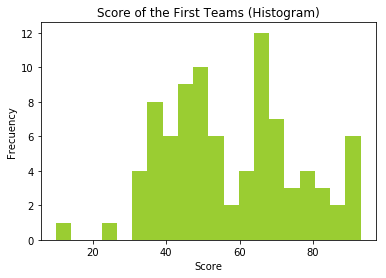

In [96]:
plt.hist(first_teams['score'], bins=20, color= 'yellowgreen')
plt.title('Score of the First Teams (Histogram)')
plt.xlabel('Score')
plt.ylabel('Frecuency')
plt.show()

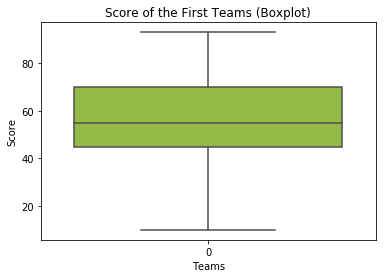

In [97]:
sns.boxplot(data=first_teams['score'], color= 'yellowgreen')
plt.title('Score of the First Teams (Boxplot)')
plt.ylabel('Score')
plt.xlabel('Teams')
plt.show()


In [98]:
last_teams['score'].describe()

count    88.000000
mean     36.738636
std      10.103481
min      14.000000
25%      30.000000
50%      36.000000
75%      43.000000
max      79.000000
Name: score, dtype: float64

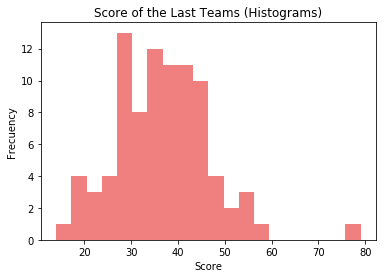

In [99]:
plt.hist(last_teams['score'], bins=20, color= 'lightcoral')
plt.title('Score of the Last Teams (Histograms)')
plt.xlabel('Score')
plt.ylabel('Frecuency')
plt.show()

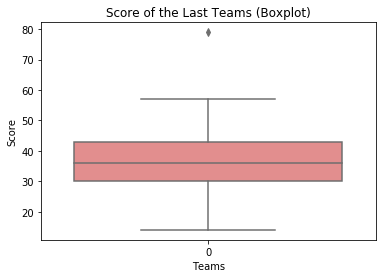

In [100]:
sns.boxplot(data=last_teams['score'], color= 'lightcoral')
plt.title('Score of the Last Teams (Boxplot)')
plt.ylabel('Score')
plt.xlabel('Teams')
plt.show()

In [101]:
player[['age', 'agility', 'balance', 'ball_control', 'bmi', 'dribbling', 'jumping', 'shot_power']].describe()

,age,agility,balance,ball_control,bmi,dribbling,jumping,shot_power
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,31.536572,64.409801,64.475483,61.222617,23.063139,57.061775,66.038401,59.564565
std,5.259070,12.166871,11.262084,14.596383,1.319108,16.898814,9.555293,15.255577
min,20.000000,21.000000,20.000000,9.000000,17.868393,5.142857,21.000000,9.923077
25%,27.000000,57.000000,58.157895,57.000000,22.164701,49.500000,60.000000,52.227597
50%,31.000000,65.730769,65.666667,64.400000,23.055908,61.333333,66.888889,63.000000
75%,35.000000,73.000000,72.000000,70.427198,23.871523,68.941518,72.363636,70.469608
max,50.000000,94.666667,94.312500,95.769231,30.865728,96.461538,94.311111,93.076923


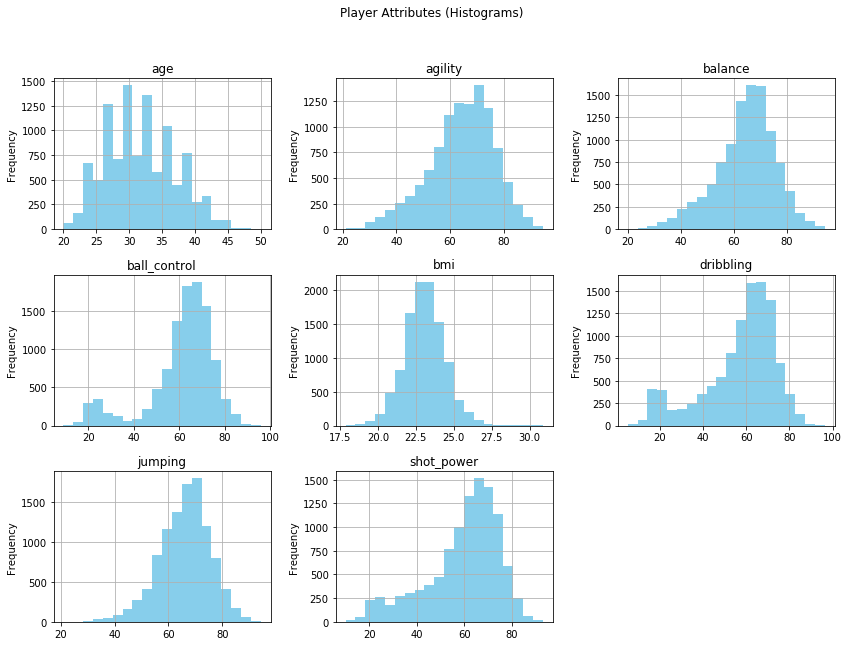

In [103]:
histogram_player = player.hist(column= ['age', 'agility', 'balance', 'ball_control', 'bmi', 'dribbling', 'jumping', 'shot_power'], 
                   figsize=(14,10), bins=20, color='skyblue')
plt.suptitle('Player Attributes (Histograms)')

for (x,y), value in np.ndenumerate(axes):
    histogram_player[x,y].set_ylabel('Frequency')


Now, to move on with the bivariate analysis, two overlapping histograms with the score variable of the first and last teams can offer a comparative visualization.

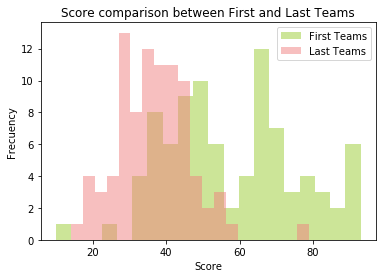

In [105]:
plt.hist(first_teams['score'], bins=20, alpha=0.5, label='First Teams', color= 'yellowgreen')
plt.hist(last_teams['score'], bins=20, alpha=0.5, label='Last Teams', color= 'lightcoral')
plt.legend(loc='upper right')
plt.title('Score comparison between First and Last Teams')
plt.ylabel('Frecuency')
plt.xlabel('Score')
plt.show()


A pair plot can be a great option for show the bivariate relationship in variables of interest of the player DataFrame. 

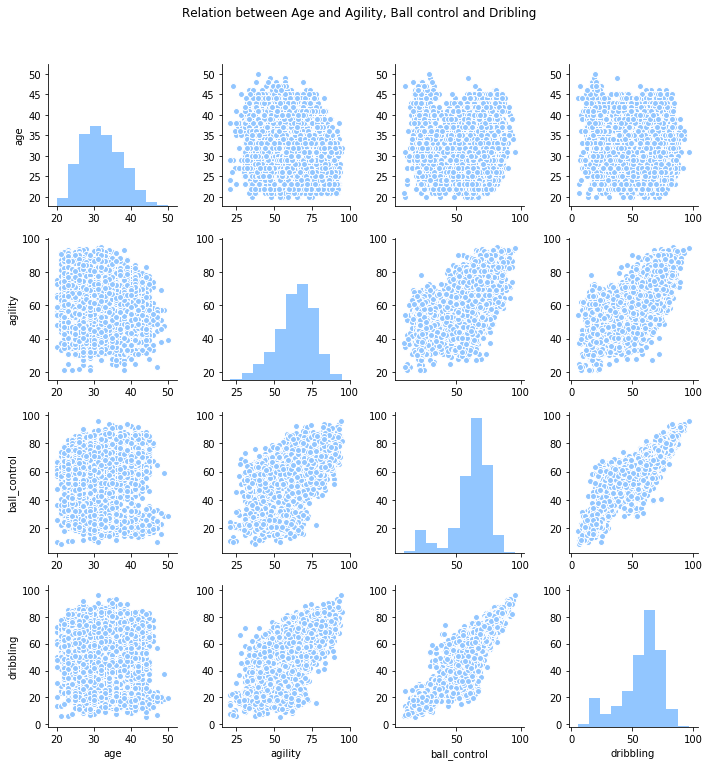

In [107]:
sns.set_palette('pastel')
pairplot_age = sns.pairplot(player[['age', 'agility', 'ball_control', 'dribbling']], palette='PuBu')
pairplot_age.fig.suptitle('Relation between Age and Agility, Ball control and Dribling', y=1.06);

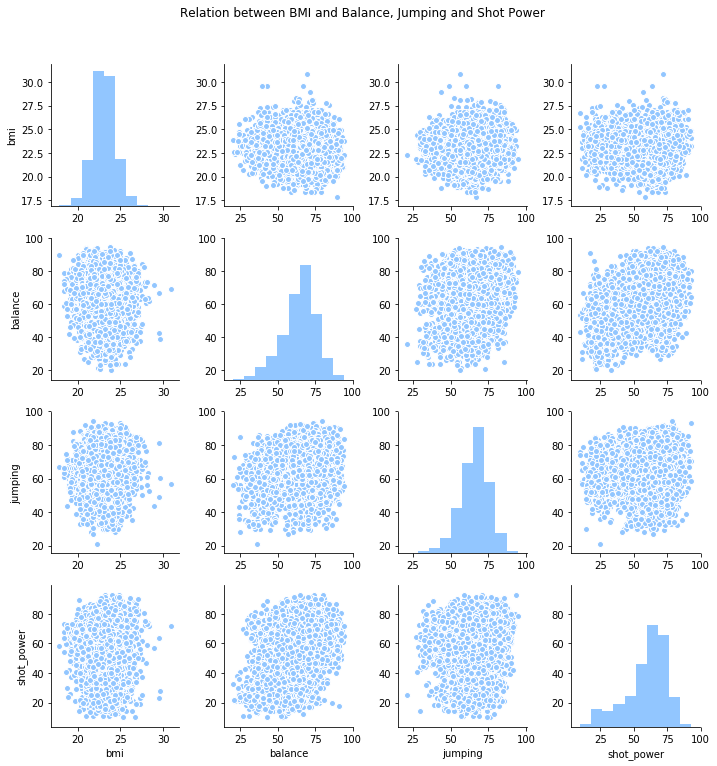

In [108]:
pairplot_bmi = sns.pairplot(player[['bmi', 'balance', 'jumping', 'shot_power']], palette='PuBu')
pairplot_bmi.fig.suptitle('Relation between BMI and Balance, Jumping and Shot Power', y=1.06);

After the exploratory data analysis phase, with the univariate and bivariate analysis, it is time to answer the project questions.

### Which are the first teams for the league and for the season?

To answer this question, the match, team, and country_league DataFrames were needed. Also, the DataFrame "first_teams" was created in the feature engineering section for this purpose.

In [84]:
first_teams.head(5)

,season,league_id,country,league,team_api_id,team_long_name,team_short_name,score
0,2008/2009,1,Belgium,Belgium Jupiler League,9987,KRC Genk,GEN,50
1,2008/2009,1729,England,England Premier League,10260,Manchester United,MUN,90
2,2008/2009,4769,France,France Ligue 1,8583,AJ Auxerre,AUX,55
3,2008/2009,7809,Germany,Germany 1. Bundesliga,9823,FC Bayern Munich,BMU,67
4,2008/2009,10257,Italy,Italy Serie A,8524,Atalanta,ATA,47


### Which are the last teams for the league and for the season?

To answer this question, the match, team, and country_league DataFrames were needed. Also, the DataFrame "last_teams" was created in the feature engineering section for this purpose.

In [85]:
last_teams.tail(5)

,season,league_id,country,league,team_api_id,team_long_name,team_short_name,score
83,2015/2016,15722,Poland,Poland Ekstraklasa,177361,Termalica Bruk-Bet Nieciecza,TBN,33
84,2015/2016,17642,Portugal,Portugal Liga ZON Sagres,188163,Tondela,TON,30
85,2015/2016,19694,Scotland,Scotland Premier League,8426,Partick Thistle F.C.,PAR,46
86,2015/2016,21518,Spain,Spain LIGA BBVA,8306,UD Las Palmas,LAS,44
87,2015/2016,24558,Switzerland,Switzerland Super League,7896,Lugano,LUG,35


Now passing into the inferential analysis, a bivariate analysis is going to be executed. First, it's going to execute a normality test in the independent variables (age and body mass index), to determine the usage of a parametric or non-parametric test. For the normality test the function normaltest of the SciPy library, it is based on  D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. The Kolgomorov Smirnoff test was discarded for the sample size. 

**α=** 0.05 <br/>
**P-value ≤ α:** The data do not follow a normal distribution (Reject H0). <br/>
**P-value > α:** Cannot conclude the data do not follow a normal distribution (Fail to reject H0).

**Null hypothesis H₀:** Data follow a normal distribution. <br/>                                                       **Alternative hypothesis H₁:** Data do not follow a normal distribution.

In [86]:
stats.normaltest(player['age'])

NormaltestResult(statistic=377.35315120438293, pvalue=1.1449970073335457e-82)

The age variable do not follow a normal distribution (P-value ≤ 0.05).

In [87]:
stats.normaltest(player['bmi'])

NormaltestResult(statistic=108.71206723025297, pvalue=2.4744264127325391e-24)

The bmi variable do not follow a normal distribution (P-value ≤ 0.05).

For the bivariate analysis of continuous data that do not follow a normal distribution, the Spearman’s rank correlation coefficient test was used to evaluate the relationship between the variables of interest.

**α=** 0.05 <br>
**P-value ≤ α:** Cannot conclude the variables are not associated. (Fail to reject H0). <br/>
**P-value > α:** The variables are not associated. (Reject H0).

**Null hypothesis H₀:** There is no association between the two variables. <br/>                                               **Alternative hypothesis H₁:** There is association between the two variables.



First, it's going to be analyzed the relationship between the variable age and three attributes of interest: balance, shot power and jumping. 

### What is the relationship between balance and age?

In [88]:
# Calculating the Spearman r test
stats.spearmanr(player['balance'], player['age'])

SpearmanrResult(correlation=-0.034538215840206311, pvalue=0.00038007341013411447)

The Spearmanr result and the pvalue determine that the age and balance variables have a weak inverse relationship according to the player data. The plot below shows a simple linear relationship between the two variables of interest. 

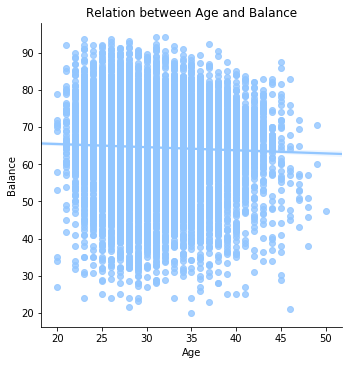

In [109]:
sns.lmplot(x = 'age', y='balance', data=player, scatter=True)
plt.title('Relation between Age and Balance')
plt.ylabel('Balance')
plt.xlabel('Age')
plt.show()

### What is the relationship between shot power and age?

In [110]:
# Calculating the Spearman r test
stats.spearmanr(player['shot_power'], player['age'])


SpearmanrResult(correlation=0.16082504074465076, pvalue=3.0047879711710858e-62)

The Spearmanr result and the pvalue determine that the age and shot power variables have a weak direct relationship according to the player data. The plot below shows a simple linear relationship between the two variables of interest.

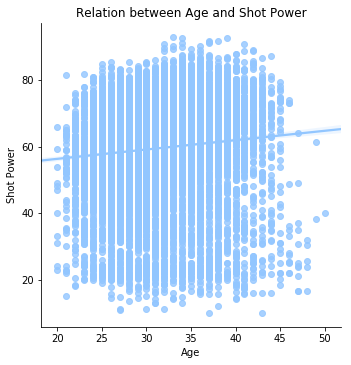

In [111]:
sns.lmplot(x = 'age', y='shot_power', data=player, scatter=True)
plt.title('Relation between Age and Shot Power')
plt.ylabel('Shot Power')
plt.xlabel('Age')
plt.show()

### What is the relationship between jumping and age?

In [112]:
# Calculating the Spearman r test
stats.spearmanr(player['jumping'], player['age'])


SpearmanrResult(correlation=0.14442680399217028, pvalue=1.9915684175757911e-50)

The Spearmanr result and the pvalue determine that the age and jumping variables have a weak direct relationship according to the player data. The plot below shows a simple linear relationship between the two variables of interest.

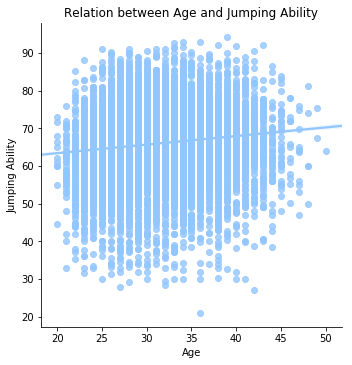

In [113]:
sns.lmplot(x = 'age', y='jumping', data=player, scatter=True)
plt.title('Relation between Age and Jumping Ability')
plt.ylabel('Jumping Ability')
plt.xlabel('Age')
plt.show()

Then, it's going to be analyzed the relationship between the player body mass index (BMI) and three attributes of interest: dribbling, agility and ball control.

### What is the relationship between dribbling and body mass index?

In [114]:
# Calculating the Spearman r test
stats.spearmanr(player['dribbling'], player['bmi'])

SpearmanrResult(correlation=-0.049311714607890314, pvalue=3.8723624608837307e-07)

The Spearmanr result and the pvalue determine that the bmi and dribbling variables have a weak inverse relationship according to the player data. The plot below shows a simple linear relationship between the two variables of interest.

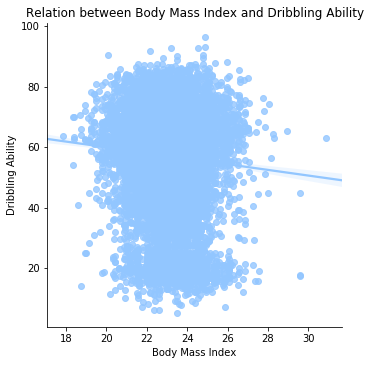

In [116]:
sns.lmplot(x = 'bmi', y='dribbling', data=player, scatter=True)
plt.title('Relation between Body Mass Index and Dribbling Ability')
plt.ylabel('Dribbling Ability')
plt.xlabel('Body Mass Index')
plt.show()

### What is the relationship between agility and body mass index?

In [117]:
# Calculating the Spearman r test
stats.spearmanr(player['agility'], player['bmi'])


SpearmanrResult(correlation=-0.10189121059176276, pvalue=7.9739437516606573e-26)

The Spearmanr result and the pvalue determine that the bmi and agility variables have a weak inverse relationship according to the player data. The plot below shows a simple linear relationship between the two variables of interest.

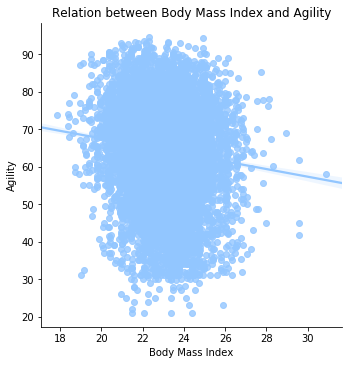

In [118]:
sns.lmplot(x = 'bmi', y='agility', data=player, scatter=True)
plt.title('Relation between Body Mass Index and Agility')
plt.ylabel('Agility')
plt.xlabel('Body Mass Index')
plt.show()

### What is the relationship between ball control and body mass index?

In [119]:
# Calculating the Spearman r test
stats.spearmanr(player['ball_control'], player['bmi'])


SpearmanrResult(correlation=-0.020006003147434781, pvalue=0.039594228805618158)

The Spearmanr result and the pvalue determine that the bmi and ball control variables have a weak inverse relationship according to the player data. The plot below shows a simple linear relationship between the two variables of interest.

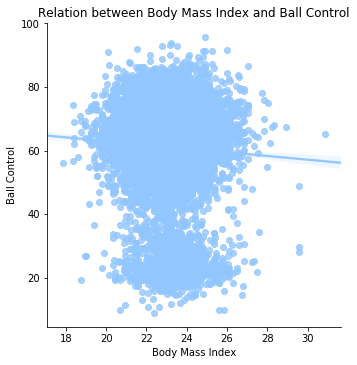

In [120]:
sns.lmplot(x = 'bmi', y='ball_control', data=player, scatter=True)
plt.title('Relation between Body Mass Index and Ball Control')
plt.ylabel('Ball Control')
plt.xlabel('Body Mass Index')
plt.show()

<a id='conclusions'></a>
## Conclusions

- The mean of the player attributes of interest, like dribbling, agility, ball control, jumping, shot power and balance are around 57 and 64 points in a scale of 1 - 100. The average age is 31 (±5) years and the average body mass index is 23 (±1) kg/m^2 which means a healthy weight.  

- Regarding the limits, it is important to mention the management with the null values, also, the outliers not were evaluated. 

- According to the Spearman r test and the respective p-value, the age and balance variables present an inverse and weak relation. For the other hand, the shot power and the jumping ability have a direct and weak relation. 

- According to the Spearman r test and the respective p-value, the body mass index and the dribbling, agility and ball control present an inverse and weak relation. 


In [121]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0